In [1]:
#Kaggle Link: https://www.kaggle.com/c/bike-sharing-demand

#Data Description

#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend no r holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
# q - number of total rentals

In [203]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [204]:
train= pd.read_csv("/home/vignesh.rs/bike_train.csv")
test=pd.read_csv("/home/vignesh.rs/bike_test.csv")
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [205]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [206]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [207]:
#Two columns registered and casual are not present in the test dataset. So we can blindly drop these columns
train.drop(columns=['casual', 'registered'], inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [208]:
#Checking null count against all columns
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

So we are not having any null values.

In [209]:
#Checking data types
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [210]:
#Converting datetime object to actual datetime format
train['datetime'] = pd.to_datetime(train['datetime'])
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object

In [211]:
#Excracting month, day, year, minute, hour and creating new features
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
#We dont need seconds since it will not create any impact

In [212]:
#We can drop datetime now.
train.drop(columns=['datetime'], inplace=True)

In [213]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,minute
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0


In [214]:
#Extracting categorical and numerical columns for reference
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
categorical_columns = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'date', 'hour', 'minute']

### Exploratory data analysis

### 1. Univariate Analysis

#### Check how much numerical columns are normally distributing 

0.003690844422472008

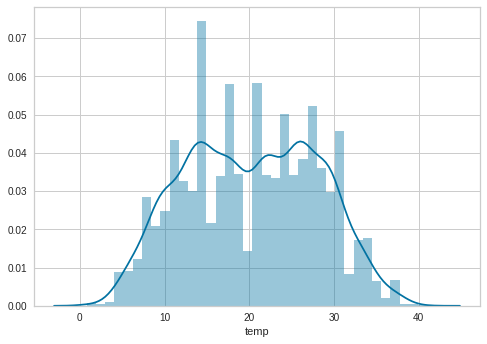

In [215]:
#temp
sns.distplot(train['temp'])
train['temp'].skew()

Seems temp doesn't have much skew.

-0.10255951346908665

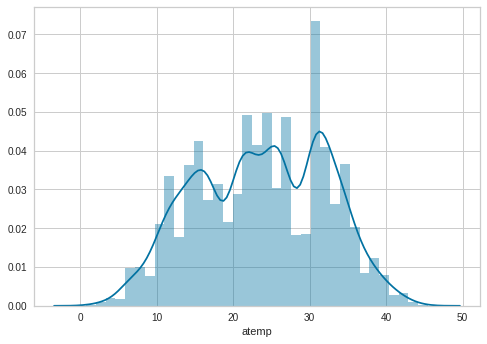

In [216]:
#atemp
sns.distplot(train['atemp'])
train['atemp'].skew()

We will normalize atemp later.

-0.08633518364548581

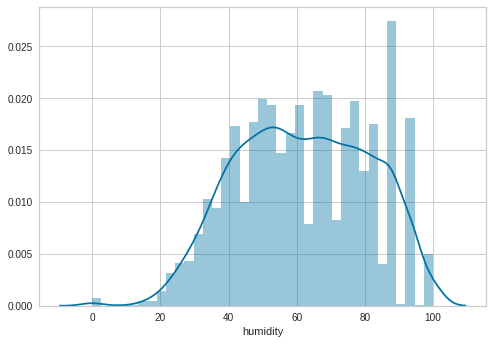

In [217]:
#humidity
sns.distplot(train['humidity'])
train['humidity'].skew()

Seems humidity doesn't have much skew.

0.5887665265853944

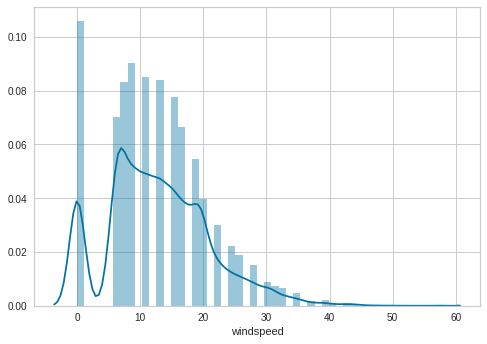

In [218]:
#windspeed
sns.distplot(train['windspeed'])
train['windspeed'].skew()

Humidity is having positive skew. We will normalize later

1.2420662117180776

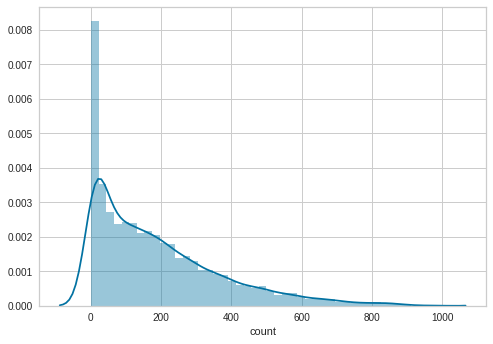

In [219]:
#count
sns.distplot(train['count'])
train['count'].skew()

Count is having postitive skew. We will normalize later.

In [220]:
#Storing columns to normalize
normalize_columns = ['atemp','windspeed','count']

### 2. Bivariate Analysis
### 2.1 Numerical vs Target

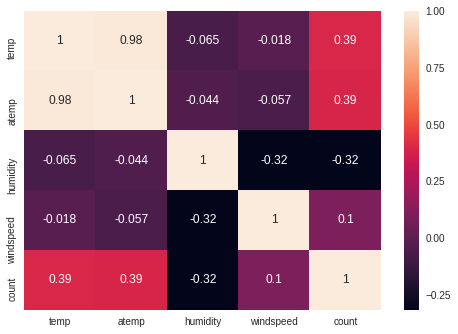

In [221]:
corr = train[numeric_columns].corr()
sns.heatmap(corr, annot=True)

Since temp and atemp are perfectly correlated, we can drop one of those columns

In [222]:
#Dropping atemp
train.drop(columns=['atemp'], inplace=True)

In [223]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,date,hour,minute
0,1,0,0,1,9.84,81,0.0,16,2011,1,1,0,0
1,1,0,0,1,9.02,80,0.0,40,2011,1,1,1,0
2,1,0,0,1,9.02,80,0.0,32,2011,1,1,2,0
3,1,0,0,1,9.84,75,0.0,13,2011,1,1,3,0
4,1,0,0,1,9.84,75,0.0,1,2011,1,1,4,0


### 2.2 Categorical vs Target

In [224]:
categorical_columns

['season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'date',
 'hour',
 'minute']

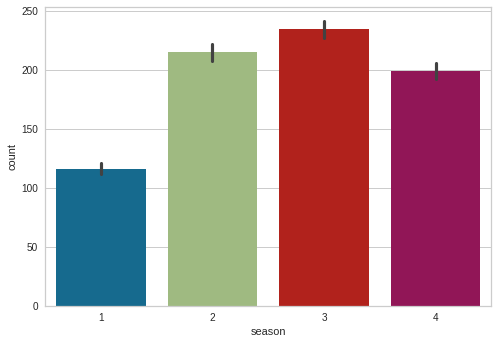

In [225]:
#season vs count
sns.barplot(x='season', y='count', data=train)

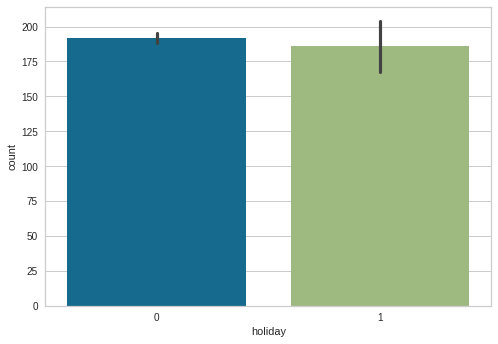

In [226]:
#holiday vs count
sns.barplot(x='holiday', y='count', data=train)

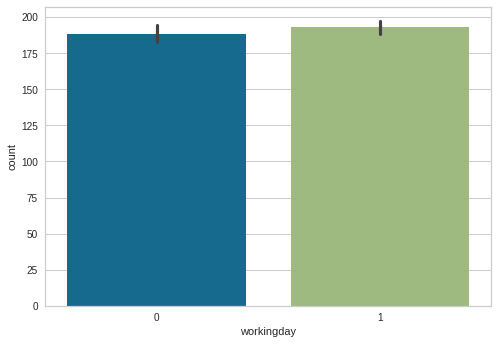

In [227]:
#workingday vs count
sns.barplot(x='workingday', y='count', data=train)

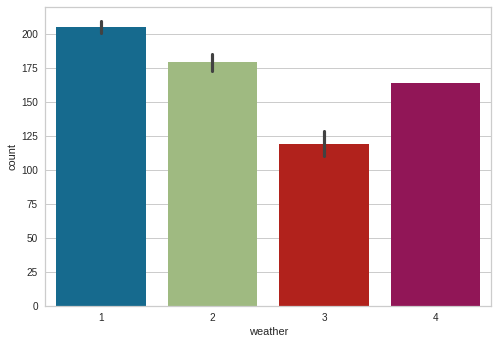

In [228]:
#weather vs count
sns.barplot(x='weather', y='count', data=train)

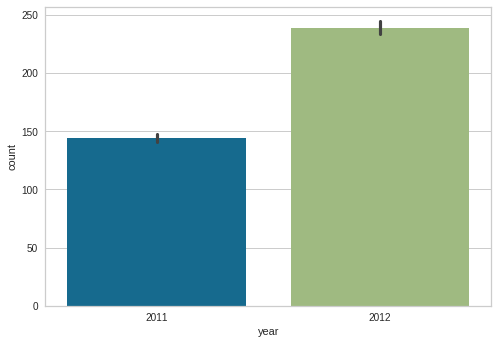

In [229]:
#year vs count
sns.barplot(x='year', y='count', data=train)

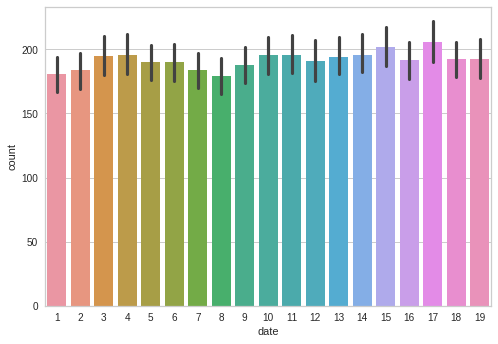

In [230]:
#date vs count
sns.barplot(x='date', y='count', data=train)

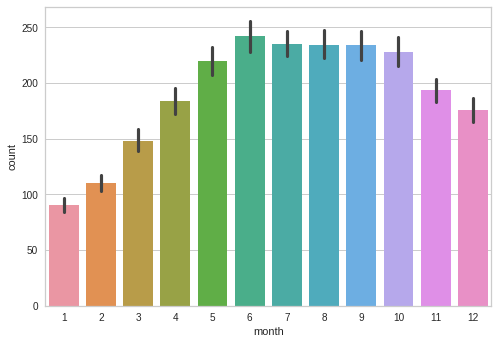

In [231]:
#month vs count
sns.barplot(x='month', y='count', data=train)

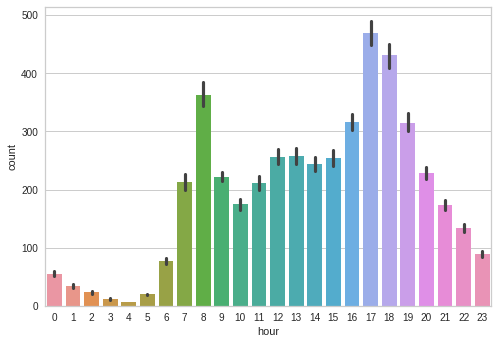

In [232]:
#hour vs count
sns.barplot(x='hour', y='count', data=train)

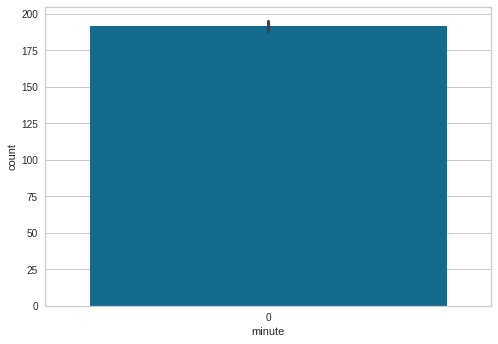

In [233]:
#minute vs count
sns.barplot(x='minute', y='count', data=train)

We can drop year and minute since year many not create any impact and also from the plot we can conclude minute is no use for us

In [234]:
#Dropping minute and year
train.drop(columns=['minute', 'year'], inplace=True)
categorical_columns.remove('minute')
categorical_columns.remove('year')

### Data Normalization

In [235]:
normalize_columns

['atemp', 'windspeed', 'count']

We have already dropped atemp column

In [236]:
train['windspeed'].skew()

0.5887665265853944

In [237]:
#windspeed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['windspeedNorm'] = scaler.fit_transform(train[['windspeed']])
train['windspeedNorm'].skew()

0.5887665265853952

In [238]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
train['windspeedNorm'] = stdscaler.fit_transform(train[['windspeed']])
train['windspeedNorm'].skew()

0.5887665265853942

In [239]:
from sklearn.preprocessing import power_transform
train['windspeedNorm'] = power_transform(train[['windspeed']], method='yeo-johnson')
train['windspeedNorm'].skew()

-0.11843331764805148

Seems yeo johnson method gives the best result. So normalize windspeed with yeo johnson.

In [240]:
train['windspeed'] = power_transform(train[['windspeed']], method='yeo-johnson')

In [241]:
train['count'].skew()

1.2420662117180776

In [242]:
#count
scaler = MinMaxScaler()
train['countNorm'] = scaler.fit_transform(train[['count']])
train['countNorm'].skew()

/home/vignesh.rs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1.2420662117180776

In [243]:
#count
scaler = StandardScaler()
train['countNorm'] = scaler.fit_transform(train[['count']])
train['countNorm'].skew()

/home/vignesh.rs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vignesh.rs/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


1.2420662117180774

In [244]:
train['countNorm'] = power_transform(train[['count']], method='box-cox')
train['countNorm'].skew()

-0.15395246212673777

In [245]:
train['countNorm'] = power_transform(train[['count']], method='yeo-johnson')
train['countNorm'].skew()

-0.14300295544233946

In [246]:
np.sqrt(train['count']).skew()

0.25764327133235915

In [247]:
np.cbrt(train['count']).skew()

-0.1128816196772989

Cube root is giving better response, we can stick with it.

In [248]:
train['count'] = np.cbrt(train['count'])
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,month,date,hour,windspeedNorm,countNorm
0,1,0,0,1,9.84,81,-1.88383,2.519842,1,1,0,-1.88383,-1.264996
1,1,0,0,1,9.02,80,-1.88383,3.419952,1,1,1,-1.88383,-0.809686
2,1,0,0,1,9.02,80,-1.88383,3.174802,1,1,2,-1.88383,-0.933525
3,1,0,0,1,9.84,75,-1.88383,2.351335,1,1,3,-1.88383,-1.350020
4,1,0,0,1,9.84,75,-1.88383,1.000000,1,1,4,-1.88383,-1.974239


In [249]:
#drop normalized temp columns
train.drop(columns=['windspeedNorm', 'countNorm'], inplace=True)

In [250]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,month,date,hour
0,1,0,0,1,9.84,81,-1.88383,2.519842,1,1,0
1,1,0,0,1,9.02,80,-1.88383,3.419952,1,1,1
2,1,0,0,1,9.02,80,-1.88383,3.174802,1,1,2
3,1,0,0,1,9.84,75,-1.88383,2.351335,1,1,3
4,1,0,0,1,9.84,75,-1.88383,1.000000,1,1,4


In [251]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
windspeed     float64
count         float64
month           int64
date            int64
hour            int64
dtype: object

In [252]:
for col in categorical_columns:
    train[col] = train[col].astype('category')

In [253]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed      float64
count          float64
month         category
date          category
hour          category
dtype: object

In [254]:
train_copy = train.copy()

In [255]:
#Converting season and weather to one hot encoding
train=pd.get_dummies(train, columns=['season', 'weather'])
train.head()

,holiday,workingday,temp,humidity,windspeed,count,month,date,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,-1.88383,2.519842,1,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,80,-1.88383,3.419952,1,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,80,-1.88383,3.174802,1,1,2,1,0,0,0,1,0,0,0
3,0,0,9.84,75,-1.88383,2.351335,1,1,3,1,0,0,0,1,0,0,0
4,0,0,9.84,75,-1.88383,1.000000,1,1,4,1,0,0,0,1,0,0,0


In [256]:
targets = train['count']
train.drop(columns=['count'], inplace=True)

In [257]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(7620, 16)
(3266, 16)


In [258]:
#RMSE
from sklearn.metrics import mean_squared_error
def rmse(expected, predicted):
    return np.sqrt(mean_squared_error(expected, predicted))

### 1. Linear Regression

In [259]:
#Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
r2score = lr.score(X_train, y_train)
train_pred = lr.predict(X_train)
print('R2score:', r2score, 'RMSE:', rmse(y_train, train_pred))

R2score: 0.4702066796256267 RMSE: 1.4706812726513863


In [260]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.45898615914569074 RMSE: 1.511778080050243


In [261]:
conda install -c districtdatalabs yellowbrick

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/home/vignesh.rs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


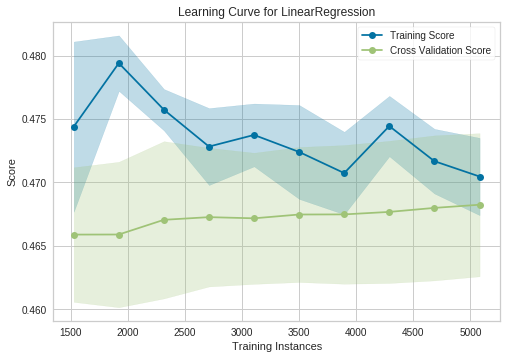

In [262]:
#Let us verify that with the learning curve
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(lr, train_sizes=sizes, scoring='r2')
viz.fit(X_train, y_train)
viz.poof()

#### This model is suffering from high bias problem

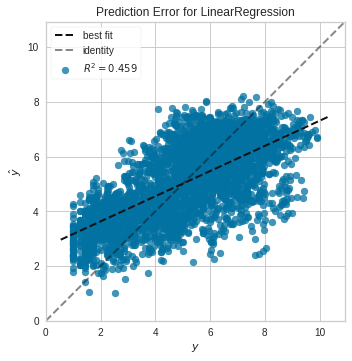

In [263]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

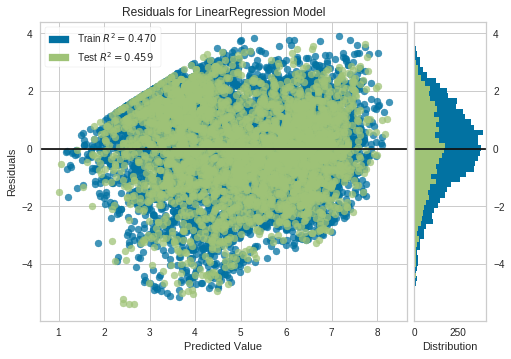

In [264]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

### 2. Polynomial Regression

In [265]:
#Try different degree of polynomial features
#Training
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
polyDf = polynomial_features.fit_transform(X_train)
lrPoly2 = LinearRegression()
lrPoly2.fit(polyDf, y_train)
train_pred = lrPoly2.predict(polyDf)
print('R2score:', r2_score(y_train, train_pred), 'RMSE:', rmse(y_train, train_pred))

R2score: 0.6301524829240434 RMSE: 1.2287871943459892


In [266]:
#Testing
polyDfTest = polynomial_features.fit_transform(X_test)
y_pred = lrPoly2.predict(polyDfTest)
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.6173440353370441 RMSE: 1.2714172508417183


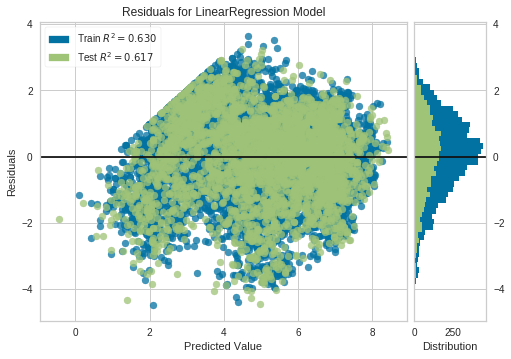

In [267]:
visualizer = ResidualsPlot(lrPoly2)
visualizer.fit(polyDf, y_train)  # Fit the training data to the model
visualizer.score(polyDfTest, y_test)  # Evaluate the model on the test data
visualizer.poof()

It seems the score is improving when we are increasing the complexity by using polynomials of degree 2

In [268]:
#Try different degree of polynomial features
#Training
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
polyDf = polynomial_features.fit_transform(X_train)
lrPoly3 = LinearRegression()
lrPoly3.fit(polyDf, y_train)
train_pred = lrPoly3.predict(polyDf)
print('R2score:', r2_score(y_train, train_pred), 'RMSE:', rmse(y_train, train_pred))

R2score: 0.714877325021821 RMSE: 1.0789000207796624


In [269]:
#Testing
polyDfTest = polynomial_features.fit_transform(X_test)
y_pred = lrPoly3.predict(polyDfTest)
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.6854683301215825 RMSE: 1.1526993450748817


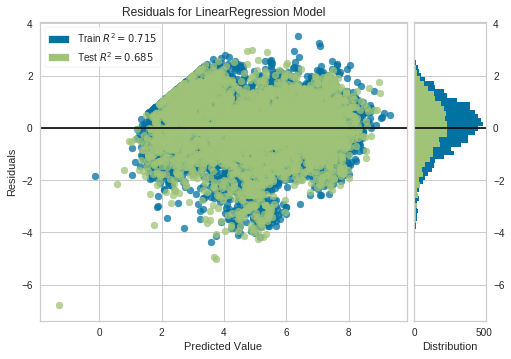

In [270]:
visualizer = ResidualsPlot(lrPoly3)
visualizer.fit(polyDf, y_train)  # Fit the training data to the model
visualizer.score(polyDfTest, y_test)  # Evaluate the model on the test data
visualizer.poof()

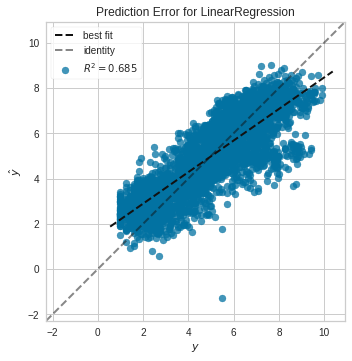

In [271]:
visualizer = PredictionError(lrPoly3)
visualizer.fit(polyDf, y_train)  # Fit the training data to the visualizer
visualizer.score(polyDfTest, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### 3. Decision Tree

In [272]:
#Training
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0, max_depth=9)
dtr.fit(X_train, y_train)
train_pred = dtr.predict(X_train)
print('R2score:', r2_score(y_train, train_pred), 'RMSE:', rmse(y_train, train_pred))

R2score: 0.8884814914237523 RMSE: 0.674743639494319


In [273]:
#Testing
y_pred = dtr.predict(X_test)
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.8561218434355231 RMSE: 0.7796169782513865


### 4. Random Forest

In [275]:
#Training
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
r2score = rf.score(X_train, y_train)
train_pred = rf.predict(X_train)
print('R2score:', r2score ,'RMSE:', rmse(y_train, train_pred))

/home/vignesh.rs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2score: 0.9830502060879669 RMSE: 0.2630555893819488


In [276]:
#Testing
r2score_test = rf.score(X_test, y_test)
test_pred = rf.predict(X_test)
print('R2score:', r2score_test ,'RMSE:',rmse(y_test, test_pred))

R2score: 0.9110606482079727 RMSE: 0.6129581671531888


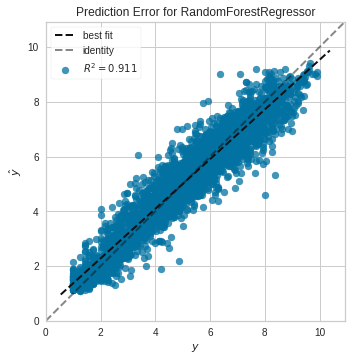

In [277]:
visualizer = PredictionError(rf)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

Still we can fine tune the model hyperparemeters. Since this model is facing high variance, we can reduce the features, and also we can add regularization.